In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
from matplotlib import pyplot as plt 
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 =train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])

In [6]:
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
survived ='survived'
not_survived ='not survived'

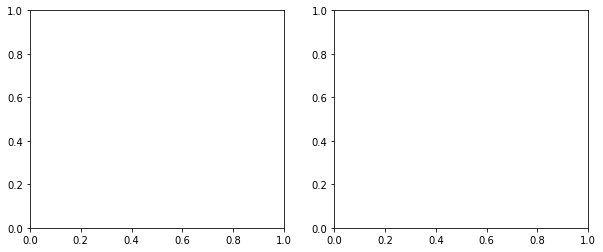

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

In [10]:
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

In [11]:
ax = snb.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived,  ax =axes[0], kde =False) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [12]:
ax = snb.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax =
axes[0], kde =False)

In [13]:
ax.legend() 

In [14]:
ax.set_title('Female')

Text(0.5, 1.0, 'Female')

In [15]:
ax = snb.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label
= survived, ax = axes[1], kde = False) 

In [16]:
ax = snb.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label
= not_survived, ax = axes[1], kde = False)

In [17]:
ax.legend()

In [18]:
 ax.set_title('Male')

Text(0.5, 1.0, 'Male')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


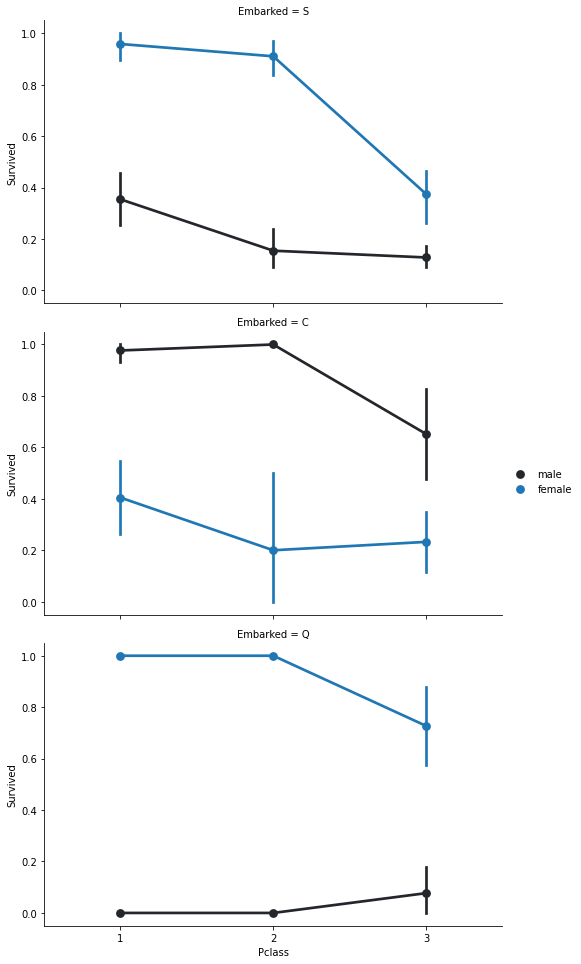

In [19]:
FacetGrid = snb.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(snb.pointplot, 'Pclass', 'Survived', 'Sex',
palette=None, order=None, hue_order=None )
FacetGrid.add_legend() 

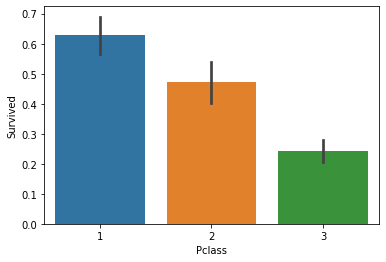

In [20]:
snb.barplot(x='Pclass', y='Survived', data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


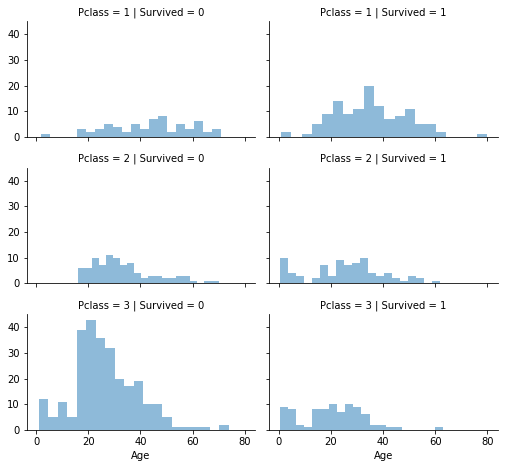

In [21]:
grid = snb.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [22]:
data = [train_df, test_df]

In [23]:
for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] =0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1 
  dataset['not_alone'] =dataset['not_alone'].astype(int)

In [24]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


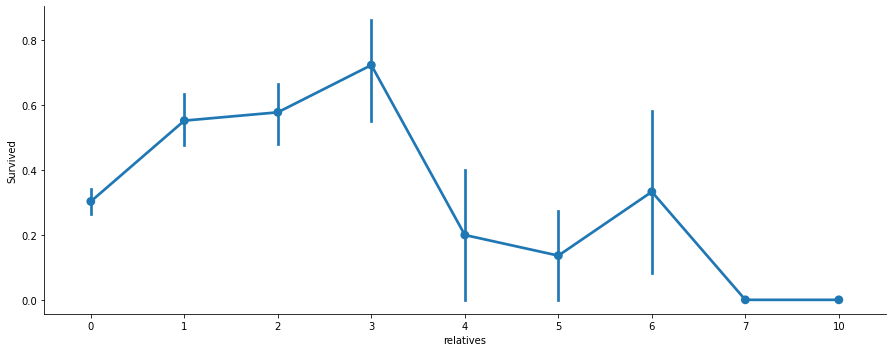

In [25]:
axes = snb.factorplot('relatives','Survived', data=train_df, aspect = 2.5, )

In [26]:
train_df = train_df.drop(['PassengerId'], axis=1) 

In [27]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U":
8} 

In [28]:
data = [train_df, test_df]

In [29]:
for dataset in data:
   dataset['Cabin'] = dataset['Cabin'].fillna("U0")
   dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([azA-Z]+)").search(x).group())
   dataset['Deck'] = dataset['Deck'].map(deck)
   dataset['Deck'] = dataset['Deck'].fillna(0)
   dataset['Deck'] = dataset['Deck'].astype(int)# we can now drop the cabin feature


In [30]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1) 

In [31]:
data = [train_df, test_df]

In [32]:
for dataset in data:
  mean = train_df["Age"].mean()
  std = test_df["Age"].std()
  is_null = dataset["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
  rand_age = np.random.randint(mean - std, mean + std, size =
is_null)
# fill NaN values in Age column with random values generated
  age_slice = dataset["Age"].copy()
  age_slice[np.isnan(age_slice)] = rand_age 
  dataset["Age"] =age_slice
  dataset["Age"] =train_df["Age"].astype(int)

In [33]:
train_df["Age"].isnull().sum() 

0

In [34]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [35]:
%matplotlib inline
df = pd.read_csv("/content/train.csv")
df['Survived_status']=df['Survived'].apply(lambda x: "No" if x==0 else "Yes")
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes


In [36]:
print("Survival Status: \n",df['Survived'].value_counts())
print("Passenger Class: ",*df['Pclass'].unique())
print("Embarked City: ",*df['Embarked'].unique())
print("# of parents / children aboard the Titanic: ",*df['Parch'].unique())
print("# of siblings / spouses aboard the Titanic: ",*df['SibSp'].unique())

Survival Status: 
 0    549
1    342
Name: Survived, dtype: int64
Passenger Class:  3 1 2
Embarked City:  S C Q nan
# of parents / children aboard the Titanic:  0 1 2 5 3 4 6
# of siblings / spouses aboard the Titanic:  1 0 3 4 2 5 8


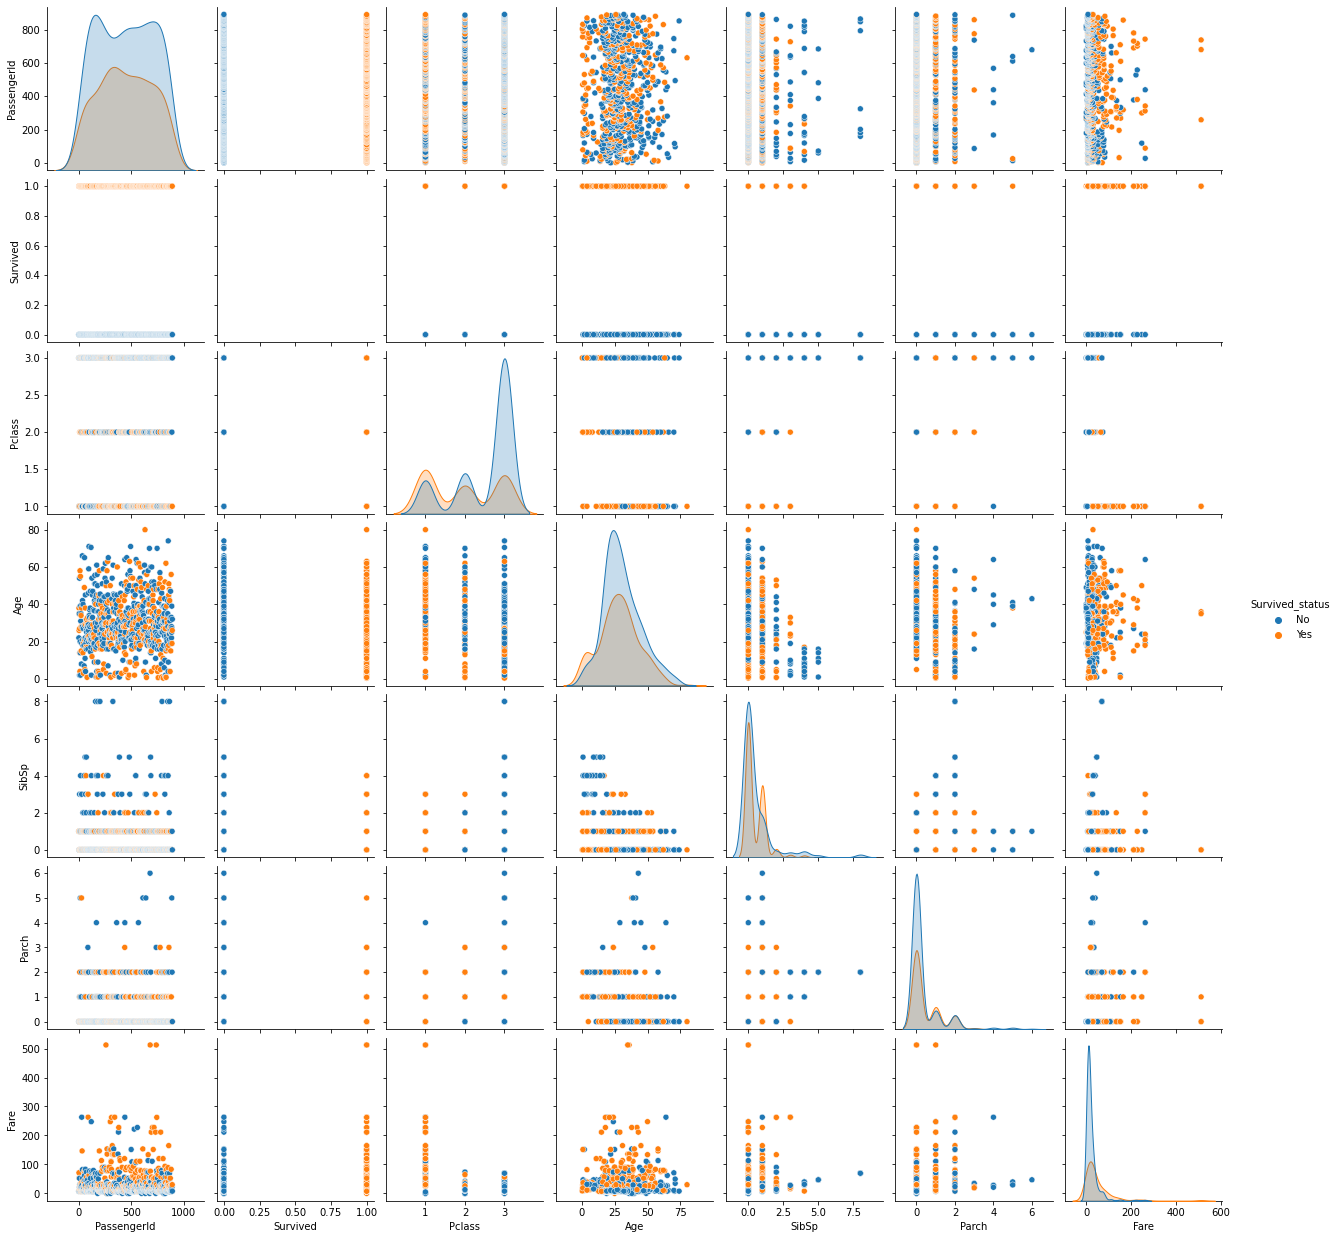

In [37]:
import seaborn as sns
sns.pairplot(df,hue='Survived_status')

Correlation matrix: 
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

Heat Map: 
 AxesSubplot(0.125,0.125;0.62x0.755)


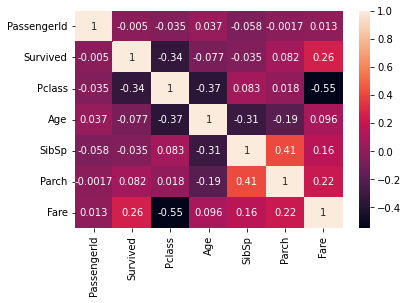

In [38]:
print("Correlation matrix: \n",df.corr())
print("\nHeat Map: \n",sns.heatmap(df.corr(),annot=True))

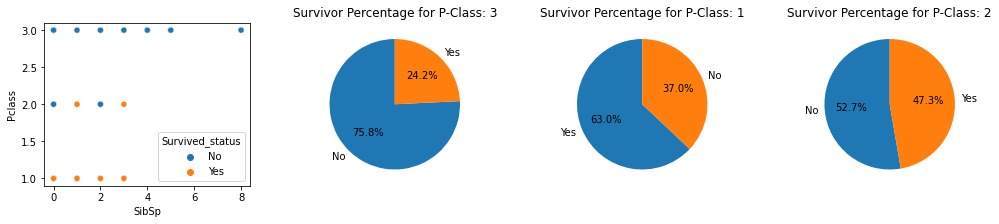

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,3))
class_1= df.loc[(df['Pclass']==1) ,:]['Survived_status'].value_counts()
class_2= df.loc[(df['Pclass']==2) ,:]['Survived_status'].value_counts()
class_3= df.loc[(df['Pclass']==3) ,:]['Survived_status'].value_counts()
plt.subplot(1,4,1)
sns.scatterplot(x='SibSp',y='Pclass',data=df,hue='Survived_status').set(title="")
plt.subplot(1,4,2)
plt.pie(class_3.values,labels=class_3.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 3")
plt.subplot(1,4,3)
plt.pie(class_1.values,labels=class_1.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 1")
plt.subplot(1,4,4)
plt.pie(class_2.values,labels=class_2.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 2")
plt.show()

In [40]:
x = df.copy()
x['generations'] = df['Age'].apply(lambda x: "young" if x<=20 else "adult" if x<=50 else "old")
pd.DataFrame(x.groupby(['Pclass','Sex','generations','Survived_status'])['Fare'].describe())

count        mean         std  \
Pclass Sex    generations Survived_status                                  
1      female adult       No                 2.0   90.131250   86.859229   
                          Yes               56.0  113.639659   84.547919   
              old         Yes               22.0   85.552836   33.815546   
              young       No                 1.0  151.550000         NaN   
                          Yes               13.0  107.540708   78.028584   
       male   adult       No                37.0   64.187381   53.674081   
                          Yes               31.0   81.947994  118.470239   
              old         No                37.0   55.215541   59.129922   
                          Yes               10.0   35.400000   15.684157   
              young       No                 3.0  141.666667  108.718643   
                          Yes                4.0  116.072900   28.703179   
2      female adult       No                 5.0   19.800000    6.534524   
                          Yes               50.0   21.459584   11.958486   
              old         No                 1.0   10.500000         NaN   
                          Yes                4.0   21.087500    9.088305   
              young       Yes               16.0   25.181250    8.699597   
       male   adult       No                64.0   21.270637   15.552742   
                          Yes                4.0   16.250000    6.500000   
              old         No                18.0   11.440278   10.854821   
                          Yes                3.0   12.454167    1.746440   
              young       No                 9.0   22.916667   20.991814   
                          Yes               10.0   25.625420    9.949187   
3      female adult       No                32.0   16.933466   10.912653   
                          Yes               22.0   13.030109    6.230672   
              old         No                17.0   23.975006   22.799548   
                          Yes               26.0   11.685900    5.854416   
              young       No                23.0   20.618117   10.646278   
                          Yes               24.0   12.789588    6.063272   
       male   adult       No               145.0    9.788214    5.994189   
                          Yes               23.0   14.432422   16.911309   
              old         No                94.0   12.622249   13.705076   
                          Yes                9.0   21.955544   20.276698   
              young       No                61.0   17.304234   13.532846   
                          Yes               15.0   13.513340    6.718884   

                                                min         25%        50%  \
Pclass Sex    generations Survived_status                                    
1      female adult       No                28.7125   59.421875   90.13125   
                          Yes               25.9292   57.716700   83.31665   
              old         Yes               26.5500   63.362500   78.73335   
              young       No               151.5500  151.550000  151.55000   
                          Yes               26.2833   57.000000   86.50000   
       male   adult       No                 0.0000   29.700000   52.00000   
                          Yes               26.2875   26.550000   52.55420   
              old         No                 0.0000   26.550000   32.32080   
                          Yes               26.5500   29.775000   30.25000   
              young       No                53.1000   81.000000  108.90000   
                          Yes               81.8583  103.627050  115.44165   
2      female adult       No                13.0000   13.000000   21.00000   
                          Yes               10.5000   13.000000   19.12500   
              old         No                10.5000   10.500000   10.50000   
                          Yes               12.3500   15.0

In [41]:
pclass_age = pd.DataFrame(df.groupby('Pclass').describe()[['Age','Fare']].reset_index())
print(df.loc[df['Fare']==0.0,:].groupby('Pclass').describe().iloc[:,0])
print(df.loc[df['Fare']==0.0,:].groupby('Sex').describe().iloc[:,0])
pclass_age

Pclass
1    5.0
2    6.0
3    4.0
Name: (PassengerId, count), dtype: float64
Sex
male    15.0
Name: (PassengerId, count), dtype: float64


Pclass    Age                                                       Fare  \
          count       mean        std   min   25%   50%   75%   max  count   
0      1  186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
1      2  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
2      3  355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                                                                 
        mean        std  min       25%      50%   75%       max  
0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292  
1  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000  
2  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [42]:
pd.DataFrame(df[df['Fare']==0].groupby(['Embarked','Sex','Survived'])['Fare'].describe())

count  mean  std  min  25%  50%  75%  max
Embarked Sex  Survived                                           
S        male 0          14.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
              1           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0

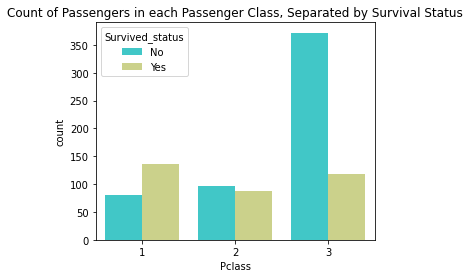

In [43]:
plt.figure(figsize=(5,4))
sns.countplot(x='Pclass',data=df, palette='rainbow',hue='Survived_status').set(title="Count of Passengers in each Passenger Class, Separated by Survival Status")
plt.show()

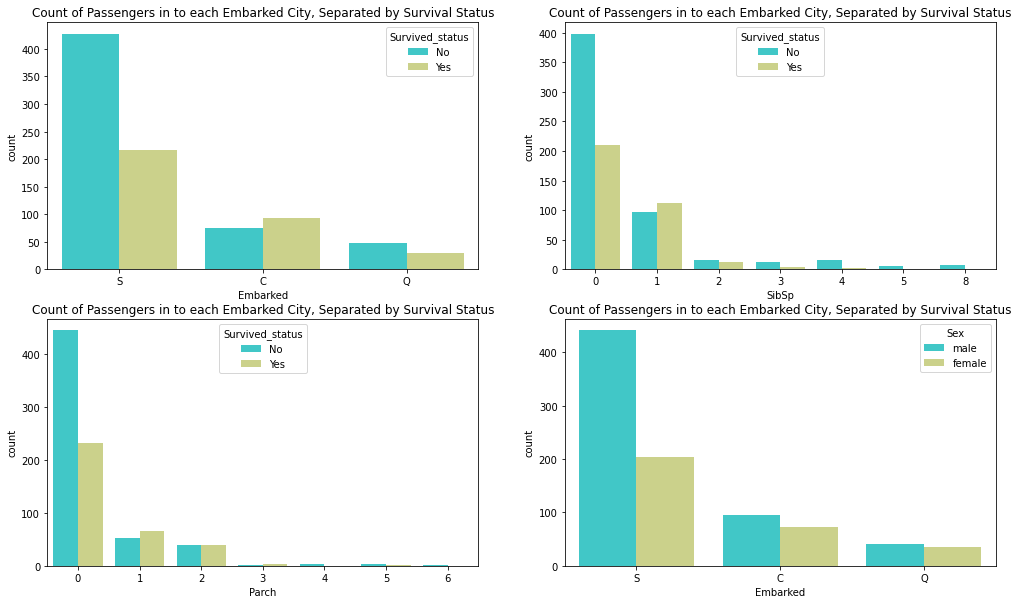

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,10))
sns.countplot(x='Embarked',data=df, palette='rainbow',hue='Survived_status',ax=axes[0][0]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='SibSp',data=df, palette='rainbow',hue='Survived_status',ax=axes[0][1]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='Parch',data=df, palette='rainbow',hue='Survived_status',ax=axes[1][0]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='Embarked',data=df, palette='rainbow',hue='Sex',ax=axes[1][1]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
plt.show()

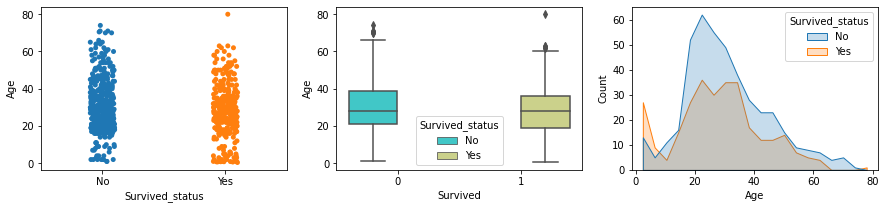

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
sns.stripplot(x='Survived_status', y='Age', data=df,ax=axes[0])
sns.boxplot(x='Survived',y='Age',hue='Survived_status',data=df, palette='rainbow',ax=axes[1])
sns.histplot(data=df,x='Age',ax=axes[2],hue='Survived_status',element="poly")

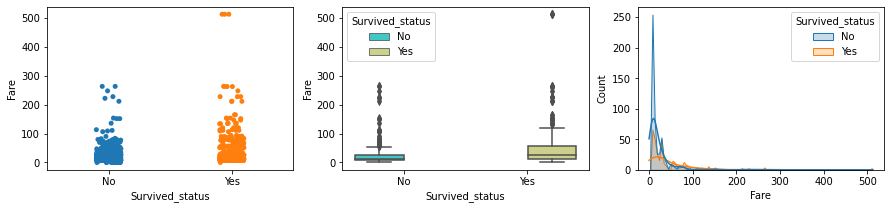

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
sns.stripplot(x='Survived_status', y='Fare', data=df,ax=axes[0])
sns.boxplot(x='Survived_status',y='Fare',hue='Survived_status',data=df, palette='rainbow',ax=axes[1])
sns.histplot(data=df,x='Fare',ax=axes[2],hue='Survived_status',bins=100,kde=True,element='poly')
plt.show()

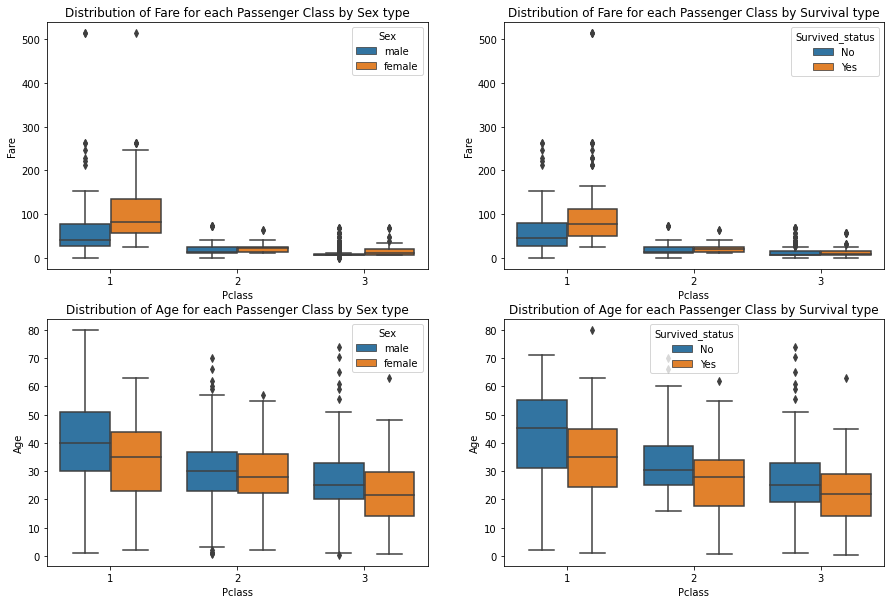

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(data=df,x='Pclass',y='Fare',hue='Sex',ax=axes[0][0]).set(title="Distribution of Fare for each Passenger Class by Sex type")
sns.boxplot(data=df,x='Pclass',y='Fare',hue='Survived_status',ax=axes[0][1]).set(title="Distribution of Fare for each Passenger Class by Survival type")
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex',ax=axes[1][0]).set(title="Distribution of Age for each Passenger Class by Sex type")
sns.boxplot(data=df,x='Pclass',y='Age',hue='Survived_status',ax=axes[1][1]).set(title="Distribution of Age for each Passenger Class by Survival type")
plt.show()

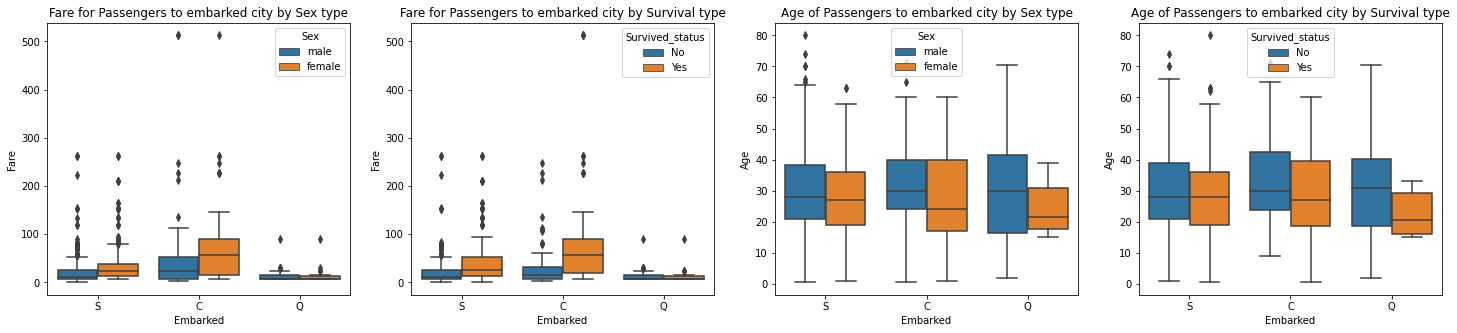

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
sns.boxplot(data=df,x='Embarked',y='Fare',hue='Sex',ax=axes[0]).set(title="Fare for Passengers to embarked city by Sex type")
sns.boxplot(data=df,x='Embarked',y='Fare',hue='Survived_status',ax=axes[1]).set(title="Fare for Passengers to embarked city by Survival type")
sns.boxplot(data=df,x='Embarked',y='Age',hue='Sex',ax=axes[2]).set(title="Age of Passengers to embarked city by Sex type")
sns.boxplot(data=df,x='Embarked',y='Age',hue='Survived_status',ax=axes[3]).set(title="Age of Passengers to embarked city by Survival type")
plt.show()

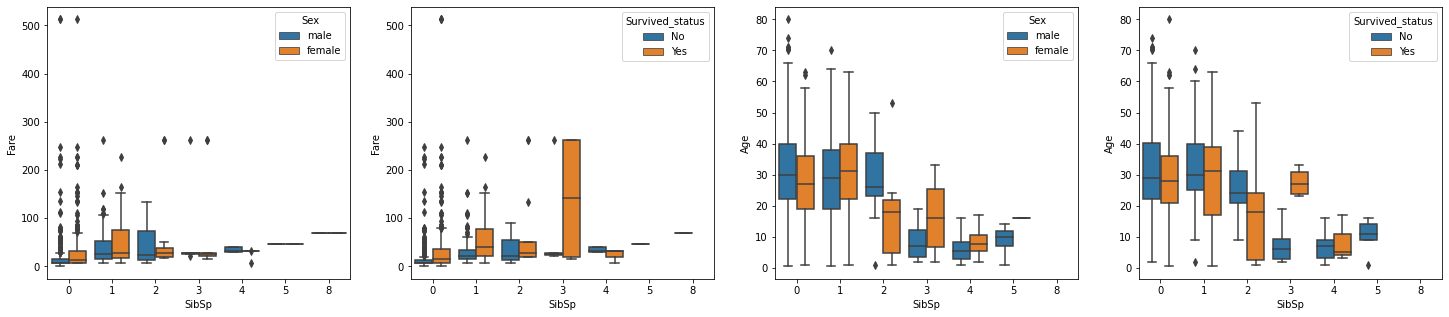

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
sns.boxplot(data=df,x='SibSp',y='Fare',hue='Sex',ax=axes[0])
sns.boxplot(data=df,x='SibSp',y='Fare',hue='Survived_status',ax=axes[1])
sns.boxplot(data=df,x='SibSp',y='Age',hue='Sex',ax=axes[2])
sns.boxplot(data=df,x='SibSp',y='Age',hue='Survived_status',ax=axes[3])
plt.show()

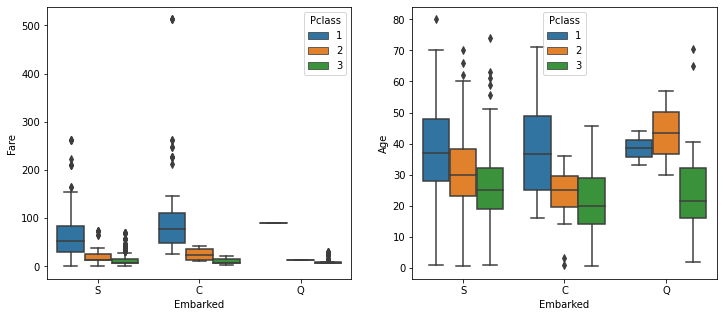

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.boxplot(data=df,x='Embarked',y='Fare',hue='Pclass',ax=axes[0])
sns.boxplot(data=df,x='Embarked',y='Age',hue='Pclass',ax=axes[1])
plt.show()

In [51]:
df['initials'] = df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])

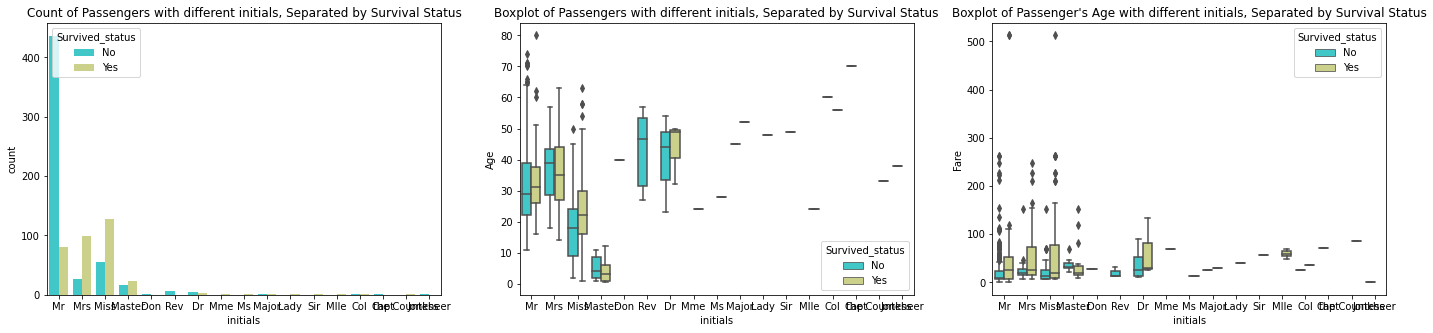

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
sns.countplot(x='initials',data=df, palette='rainbow',hue='Survived_status',ax=axes[0]).set(title="Count of Passengers with different initials, Separated by Survival Status")
sns.boxplot(x='initials',y='Age',data=df, palette='rainbow',hue='Survived_status',ax=axes[1]).set(title="Boxplot of Passengers with different initials, Separated by Survival Status")
sns.boxplot(x='initials',y='Fare',data=df, palette='rainbow',hue='Survived_status',ax=axes[2]).set(title="Boxplot of Passenger's Age with different initials, Separated by Survival Status")
plt.show()

In [53]:
df[df['Cabin']=="G6"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Yes,Miss
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,No,Miss
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,No,Mrs
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Yes,Mrs


In [54]:
df[df['Cabin']=='B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Yes,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Yes,Mrs


In [55]:
df.groupby(['Embarked','Survived_status'])['Fare'].describe()['count']

Embarked  Survived_status
C         No                  75.0
          Yes                 93.0
Q         No                  47.0
          Yes                 30.0
S         No                 427.0
          Yes                217.0
Name: count, dtype: float64

In [56]:
cab = df['Cabin'].value_counts()[df['Cabin'].value_counts()>1].index
multiple_families_cabin = []
for cabin in df['Cabin'].unique():
    families = list(set(df[df['Cabin']==cabin]['Name'].apply(lambda x: x.split(",")[0]).values))
    if len(families)>1:
        multiple_families_cabin.append(cabin)
df['Surname'] = df['Name'].apply(lambda x: x.split(",")[0])
print("Cabin having multiple Families: ",multiple_families_cabin)
df[df['Cabin'].isin(multiple_families_cabin)].groupby(['Cabin','Ticket','Embarked','Surname','Survived_status'])['Fare'].describe()[['count','50%']]

Cabin having multiple Families:  ['G6', 'C52', 'B28', 'F33', 'F G73', 'E101', 'E33', 'B77', 'C125', 'D', 'C124', 'B35', 'D20', 'E25', 'B51 B53 B55', 'B5', 'E24', 'D17']


count  \
Cabin       Ticket          Embarked Surname                Survived_status          
B35         PC 17477        C        Aubart                 Yes                1.0   
                                     Sagesser               Yes                1.0   
B5          24160           S        Allen                  Yes                1.0   
                                     Madill                 Yes                1.0   
B51 B53 B55 695             S        Carlsson               No                 1.0   
            PC 17755        C        Cardeza                Yes                1.0   
B77         110152          S        Cherry                 Yes                1.0   
                                     Rothes                 Yes                1.0   
C124        113028          S        Klaber                 No                 1.0   
            113043          S        Partner                No                 1.0   
C125        PC 17582        S        Graham                 Yes                1.0   
                                     Shutes                 Yes                1.0   
C52         110564          S        Bjornstrom-Steffansson Yes                1.0   
            19947           S        Woolner                Yes                1.0   
D           28551           S        Ball                   Yes                1.0   
            SC/AH Basle 541 C        Jerwan                 Yes                1.0   
            SC/Paris 2163   C        Levy                   No                 1.0   
D17         17465           S        Leader                 Yes                1.0   
            17466           S        Swift                  Yes                1.0   
D20         36947           C        Eustis                 Yes                1.0   
                                     Stephenson             Yes                1.0   
E101        226593          Q        Keane                  Yes                1.0   
            27267           S        Webber                 Yes                1.0   
            34218           S        Troutt                 Yes                1.0   
E24         PC 17475        S        Silverthorne           Yes                1.0   
            PC 17476        S        Calderhead             Yes                1.0   
E25         PC 17473        S        McGough                Yes                1.0   
            PC 17474        S        Flynn                  Yes                1.0   
E33         113505          S        Bowerman               Yes                1.0   
                                     Chibnall               Yes                1.0   
F G73       348123          S        Moen                   No                 1.0   
            348124          S        Soholt                 No                 1.0   
F33         248733          S        Brown                  Yes                1.0   
            C.A. 29395      S        Nye                    Yes                1.0   
            C.A. 34260      S        Lemore                 Yes                1.0   
G6          347054          S        Strom                  No                 2.0   
            PP 9549         S        Sandstrom              Yes                2.0   

                                                                                  50%  
Cabin       Ticket          Embarked Surname                Survived_status            
B35         PC 17477        C        Aubart                 Yes               69.3000  
                                     Sagesser               Yes               69.3000  
B5          24160           S        Allen                  Yes              211.3375  
                                     Madill                 Yes              211.3375  
B51 B53 B55 695             S        Carlsson               No                 5.0000  
            PC 17755        C        Cardeza                Yes              512.3292  
B77         110152

In [57]:
df_pclass1 = df[df['Pclass']==1]

survivor_pclass = pd.DataFrame(df_pclass1['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Male','female']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Male']=df_pclass1.loc[(df_pclass1['Survived_status']=='No') & (df_pclass1['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','female']=df_pclass1.loc[(df_pclass1['Survived_status']=='No') & (df_pclass1['Sex']=='female'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Male']=df_pclass1.loc[(df_pclass1['Survived_status']=='Yes') & (df_pclass1['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','female']=df_pclass1.loc[(df_pclass1['Survived_status']=='Yes') & (df_pclass1['Sex']=='female'),].shape[0]

from scipy.stats import chi2_contingency
def contigency_independence(df):
  return chi2_contingency(np.matrix(df))

print("\nContigency Table for Pclass-1, relation between Survival & Gender\n\n",survivor_pclass)
print("\nChi-Square Test for Independence, p-value : ",contigency_independence(survivor_pclass[survivor_pclass.columns[1:]])[1])


Contigency Table for Pclass-1, relation between Survival & Gender

   Survived Male female
0      Yes   45     91
1       No   77      3

Chi-Square Test for Independence, p-value :  5.603075003861579e-19


In [58]:
df_pclass2 = df[df['Pclass']==3]

survivor_pclass = pd.DataFrame(df_pclass2['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Male','female']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Male']=df_pclass2.loc[(df_pclass2['Survived_status']=='No') & (df_pclass2['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','female']=df_pclass2.loc[(df_pclass2['Survived_status']=='No') & (df_pclass2['Sex']=='female'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Male']=df_pclass2.loc[(df_pclass2['Survived_status']=='Yes') & (df_pclass2['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','female']=df_pclass2.loc[(df_pclass2['Survived_status']=='Yes') & (df_pclass2['Sex']=='female'),].shape[0]

print("\nContigency Table for Pclass-3, relation between Survival & Gender\n\n",survivor_pclass)
print("\nChi-Square Test for Independence, p-value : ",contigency_independence(survivor_pclass[survivor_pclass.columns[1:]])[1])


Contigency Table for Pclass-3, relation between Survival & Gender

   Survived Male female
0       No  300     72
1      Yes   47     72

Chi-Square Test for Independence, p-value :  2.52620586012811e-17


In [59]:
survivor_pclass = pd.DataFrame(df['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=1']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==1),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=2']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==2),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=3']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==3),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=1']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==1),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=2']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==2),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=3']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==3),].shape[0]


print("\nContigency Table : relation between Survival & Pclass\n\n",survivor_pclass)
print("\nChi-Square Test for Independence, p-value : ",contigency_independence(survivor_pclass[survivor_pclass.columns[1:]])[1])


Contigency Table : relation between Survival & Pclass

   Survived Pclass=1 Pclass=2 Pclass=3
0       No       80       97      372
1      Yes      136       87      119

Chi-Square Test for Independence, p-value :  4.549251711298793e-23


In [60]:
survivor_gender = pd.DataFrame(df['Survived_status'].unique(),columns=['Survived'])
survivor_gender[['female','male']] = None
survivor_gender.loc[survivor_gender['Survived']=='No','female']=df.loc[(df['Survived_status']=='No') & (df['Sex']=='female'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='No','male']=df.loc[(df['Survived_status']=='No') & (df['Sex']=='male'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='Yes','female']=df.loc[(df['Survived_status']=='Yes') & (df['Sex']=='female'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='Yes','male']=df.loc[(df['Survived_status']=='Yes') & (df['Sex']=='male'),].shape[0]
survivor_gender

print("\nContigency Table : relation between Survival & Gender\n\n",survivor_pclass)
print("\nChi-Square Test for Independence, p-value : ",contigency_independence(survivor_gender[survivor_gender.columns[1:]])[1])


Contigency Table : relation between Survival & Gender

   Survived Pclass=1 Pclass=2 Pclass=3
0       No       80       97      372
1      Yes      136       87      119

Chi-Square Test for Independence, p-value :  1.1973570627755645e-58


In [61]:
sex_pclass = pd.DataFrame(df['Sex'].unique(),columns=['Sex'])
sex_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=1']=df.loc[(df['Sex']=='male') & (df['Pclass']==1),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=2']=df.loc[(df['Sex']=='male') & (df['Pclass']==2),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=3']=df.loc[(df['Sex']=='male') & (df['Pclass']==3),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=1']=df.loc[(df['Sex']=='female') & (df['Pclass']==1),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=2']=df.loc[(df['Sex']=='female') & (df['Pclass']==2),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=3']=df.loc[(df['Sex']=='female') & (df['Pclass']==3),].shape[0]

print("\nContigency Table : relation between Survival & Pclass\n\n",survivor_pclass)
print("\nChi-Square Test for Independence, p-value : ",contigency_independence(sex_pclass[sex_pclass.columns[1:]])[1])


Contigency Table : relation between Survival & Pclass

   Survived Pclass=1 Pclass=2 Pclass=3
0       No       80       97      372
1      Yes      136       87      119

Chi-Square Test for Independence, p-value :  0.0002063886434823315


In [62]:
df_male = df.loc[df['Sex']=='male',:]
male_survivor_pclass = pd.DataFrame(df_male['Survived_status'].unique(),columns=['Survived'])
male_survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=1']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==1),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=2']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==2),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=3']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==3),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=1']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==1),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=2']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==2),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=3']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==3),].shape[0]

print("\nContigency Table for Male: relation between Survival & Pclass\n\n",survivor_pclass)
print("\nChi-Square Test for Independence, p-value : ",contigency_independence(male_survivor_pclass[male_survivor_pclass.columns[1:]])[1])


Contigency Table for Male: relation between Survival & Pclass

   Survived Pclass=1 Pclass=2 Pclass=3
0       No       80       97      372
1      Yes      136       87      119

Chi-Square Test for Independence, p-value :  6.983959431184943e-08


In [63]:
female_survivor_pclass = pd.DataFrame(df_male['Survived_status'].unique(),columns=['Survived'])
female_survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=1']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==1),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=2']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==2),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=3']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==3),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=1']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==1),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=2']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==2),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=3']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==3),].shape[0]

print("\nContigency Table for Female: relation between Survival & Pclass\n\n",survivor_pclass)
print("\nChi-Square Test for Independence, p-value : ",contigency_independence(female_survivor_pclass[female_survivor_pclass.columns[1:]])[1])


Contigency Table for Female: relation between Survival & Pclass

   Survived Pclass=1 Pclass=2 Pclass=3
0       No       80       97      372
1      Yes      136       87      119

Chi-Square Test for Independence, p-value :  6.983959431184943e-08


In [64]:
print("--------Percentage of data missing from Variables: --------")
(df.isna().sum()/len(df)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

--------Percentage of data missing from Variables: --------


PassengerId          0.0%
Survived             0.0%
Pclass               0.0%
Name                 0.0%
Sex                  0.0%
Age                19.86%
SibSp                0.0%
Parch                0.0%
Ticket               0.0%
Fare                 0.0%
Cabin               77.1%
Embarked            0.22%
Survived_status      0.0%
initials             0.0%
Surname              0.0%
dtype: object

In [65]:
pclass_age = pd.DataFrame(df.groupby('Pclass').describe()['Age'].reset_index())
pclass_age['% missing data'] = pclass_age['Pclass'].apply(lambda x: str(((100*df[df['Pclass']==x].isna().sum()['Age']/df['Age'].isna().sum())*100//1)/100)+"%")
pclass_age['Correlation with Fare'] = pclass_age['Pclass'].apply(lambda x: df[df['Pclass']==x][['Age','Fare']].corr().iloc[0,1] )
pclass_age

,Pclass,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0,16.94%,-0.218611
1,2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0,6.21%,-0.197038
2,3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0,76.83%,-0.260315


In [66]:
survivor_age = pd.DataFrame(df.groupby('Survived_status').describe()['Age'].reset_index())
survivor_age['% missing data'] = survivor_age['Survived_status'].apply(lambda x: str(((100*100*df[df['Survived_status']==x].isna().sum()['Age']/df['Age'].isna().sum())//1)/100)+"%")
survivor_age['Correlation with Fare'] = survivor_age['Survived_status'].apply(lambda x: df[df['Survived_status']==x][['Age','Fare']].corr().iloc[0,1] )
survivor_age

,Survived_status,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,No,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0,70.62%,0.076852
1,Yes,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0,29.37%,0.162648


In [67]:
embark_age = pd.DataFrame(df.groupby('Embarked').describe()['Age'].reset_index())
embark_age['% missing data'] = embark_age['Embarked'].apply(lambda x: str(((100*df[df['Embarked']==x].isna().sum()['Age']/df['Age'].isna().sum())*100//1)/100)+"%")
embark_age['Correlation with Fare'] = embark_age['Embarked'].apply(lambda x: df[df['Embarked']==x][['Age','Fare']].corr().iloc[0,1] )
embark_age

,Embarked,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,C,130.0,30.814769,15.434860,0.42,21.25,29.0,40.0,71.0,21.46%,0.160451
1,Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5,27.68%,0.027276
2,S,554.0,29.445397,14.143192,0.67,21.00,28.0,38.0,80.0,50.84%,0.052419


In [68]:
survivor_age = pd.DataFrame(df.groupby('Sex').describe()['Age'].reset_index())
survivor_age['% missing data'] = survivor_age['Sex'].apply(lambda x: str(((100*100*df[df['Sex']==x].isna().sum()['Age']/df['Age'].isna().sum())//1)/100)+"%")
survivor_age['Correlation with Fare'] = survivor_age['Sex'].apply(lambda x: df[df['Sex']==x][['Age','Fare']].corr().iloc[0,1] )
survivor_age

,Sex,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0,29.94%,0.171468
1,male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0,70.05%,0.077331


In [69]:
import itertools
listOLists = [df['Pclass'].unique(), df['Sex'].unique(), df['Survived_status'].unique()]
sequence = pd.DataFrame(columns=['Pclass','Sex','Survived_status','mean_Age','median_age','% of Age missing'])
for l in itertools.product(*listOLists):
    a=df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].mean()
    b=df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].median()
    c=str((100*df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].isna().sum()/df['Age'].isna().sum())*100//1/100)+"%"
    sequence.loc[len(sequence),:] = [*list(l),a,b,c]
sequence

,Pclass,Sex,Survived_status,mean_Age,median_age,% of Age missing
0,3,male,No,27.255814,25.0,48.02%
1,3,male,Yes,22.274211,25.0,5.08%
2,3,female,No,23.818182,22.0,9.6%
3,3,female,Yes,19.329787,19.0,14.12%
4,1,male,No,44.581967,45.5,9.03%
5,1,male,Yes,36.248,36.0,2.82%
6,1,female,No,25.666667,25.0,0.0%
7,1,female,Yes,34.939024,35.0,5.08%
8,2,male,No,33.369048,30.5,3.95%
9,2,male,Yes,16.022,3.0,1.12%


In [70]:
for l in itertools.product(*listOLists):
  df.loc[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2]) & (df['Age'].isnull()),'Age'] = df.loc[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2]), ['Age']].median()[0]

In [71]:
print(df['Embarked'].isna().sum())
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
print(df['Embarked'].isna().sum())

2
0


In [72]:
dff = df.copy()
dff['Sex']=dff['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff['pclass=1'] = (dff['Pclass']==1).astype('int')
dff['pclass=2'] = (dff['Pclass']==2).astype('int')
dff['pclass=3'] = (dff['Pclass']==3).astype('int')
dff['Embarked=S'] = (dff['Embarked']=='S').astype('int')
dff['Embarked=C'] = (dff['Embarked']=='C').astype('int')
dff['Embarked=Q'] = (dff['Embarked']=='Q').astype('int')
dff.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Survived_status,initials,Surname,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,S,No,Mr,Braund,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,C,Yes,Mrs,Cumings,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Yes,Miss,Heikkinen,0,0,1,1,0,0


In [73]:
df['initials'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: initials, dtype: int64

In [74]:
dff['initials=Master'] = (dff['initials']=='Master').astype('int')
dff['initials=Mr'] = (dff['initials']=='Mr').astype('int')
dff['initials=Miss'] = (dff['initials']=='Miss').astype('int')
dff['initials=Mrs'] = (dff['initials']=='Mrs').astype('int')
print(dff.columns)
dff.head(3)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_status',
       'initials', 'Surname', 'pclass=1', 'pclass=2', 'pclass=3', 'Embarked=S',
       'Embarked=C', 'Embarked=Q', 'initials=Master', 'initials=Mr',
       'initials=Miss', 'initials=Mrs'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0,0,1,0


In [75]:
dff.drop(['PassengerId','Pclass','Name','Ticket','Cabin','Embarked','Survived_status','SibSp','Parch','initials','Surname'],axis=1,inplace=True)

In [76]:
dff.head(3)

,Survived,Sex,Age,Fare,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,0,0,22.0,7.2500,0,0,1,1,0,0,0,1,0,0
1,1,1,38.0,71.2833,1,0,0,0,1,0,0,0,0,1
2,1,1,26.0,7.9250,0,0,1,1,0,0,0,0,1,0


In [77]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x=dff[[col for col in list(dff.columns) if col!='Survived']]
x = sc_x.fit_transform(x) 
y=dff['Survived']

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_cv, y_train, y_cv = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=0
)

In [79]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred = model.predict(x_cv)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [81]:
print("Accuracy of Logistic Model: ",sum([y_pred==y_cv][0].values)/len(y_cv))

Accuracy of Logistic Model:  0.7982062780269058


In [82]:
print("Overall Accuracy of Logistic Model on CV dataset: ",sum([y_pred==y_cv][0].values)/len(y_cv))
print("Overall Accuracy of Logistic Model on Train dataset: ",sum([model.predict(x_train)==y_train][0].values)/len(y_train))

Overall Accuracy of Logistic Model on CV dataset:  0.7982062780269058
Overall Accuracy of Logistic Model on Train dataset:  0.8188622754491018


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_cv, y_pred)

true_pos_rate = len(y_pred[(y_cv==y_pred) & (y_pred==1)])/sum(y_cv==1)
true_neg_rate = len(y_pred[(y_cv==y_pred) & (y_pred==0)])/sum(y_cv==0)
false_pos_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==1)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) + len(y_pred[(y_cv==y_pred) & (y_pred==0)]))
false_neg_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==0)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==0)]) + len(y_pred[(y_cv==y_pred) & (y_pred==1)]))

In [84]:
confusion_matrix(y_cv, y_pred)

array([[115,  24],
       [ 21,  63]])

In [85]:
print(false_neg_rate, false_pos_rate, true_neg_rate, true_pos_rate)

0.25 0.17266187050359713 0.8273381294964028 0.75


In [86]:
from sklearn.metrics import precision_score,recall_score,f1_score

print("Recall: TP/(TP+FN) is := ",len(y_pred[(y_cv==y_pred) & (y_pred==1)])/( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==0)])))
print("Precision: TP/(TP+FP) is := ", len(y_pred[(y_cv==y_pred) & (y_pred==1)]) / ( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) ))
print("F1 Score: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y_cv, y_pred)) + (1/precision_score(y_cv, y_pred))) )

Recall: TP/(TP+FN) is :=  0.75
Precision: TP/(TP+FP) is :=  0.7241379310344828
F1 Score: 2/(1/recall + 1/precision) is :=  0.7368421052631579


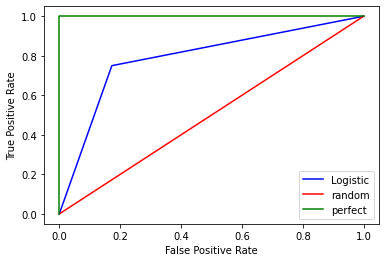

In [87]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_cv, y_pred)

plt.plot(fpr,tpr,'b-', label= 'Logistic')
plt.plot([0,1],[0,1],'r-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score
print("AUC Score := ", roc_auc_score(y_cv, y_pred))

AUC Score :=  0.7886690647482014


In [89]:
x=dff[[col for col in list(dff.columns) if col!='Survived']]
x = sc_x.fit_transform(x) 
y=dff['Survived']

train_x,test_x,train_y,test_y=[None]*4
num_shuffles=300
shuffled = pd.DataFrame(columns=['Shuffle No','train_accuracy','cv_accuracy','train_recall','cv_recall','train_precision','cv_precision','train_f1score','cv_f1score','train_auc','cv_auc'])
for i in range(num_shuffles):
  train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=None,test_size=0.3,shuffle=True)
  model.fit(train_x,train_y)
  
  y_pred = model.predict(train_x)
  accuracy_train = sum([y_pred==train_y][0].values)/len(train_y)
  
  tr_precision = precision_score(train_y, y_pred)
  tr_recall = recall_score(train_y, y_pred)
  tr_f1score = f1_score(train_y, y_pred)
  tr_auc = roc_auc_score(train_y, y_pred)

  y_pred = model.predict(test_x)
  accuracy_cv = sum([y_pred==test_y][0].values)/len(test_y)

  cv_precision = precision_score(test_y, y_pred)
  cv_recall = recall_score(test_y, y_pred)
  cv_f1score = f1_score(test_y, y_pred)
  cv_auc = roc_auc_score(test_y, y_pred)

  shuffled.loc[len(shuffled.index)]=[int(i+1), accuracy_train, accuracy_cv, tr_recall, cv_recall, tr_precision, cv_precision, tr_f1score, cv_f1score, tr_auc, cv_auc]
shuffled.head(5)

,Shuffle No,train_accuracy,cv_accuracy,train_recall,cv_recall,train_precision,cv_precision,train_f1score,cv_f1score,train_auc,cv_auc
0,1.0,0.802568,0.794776,0.737705,0.724490,0.753138,0.717172,0.745342,0.720812,0.791016,0.779892
1,2.0,0.821830,0.768657,0.769547,0.686869,0.772727,0.686869,0.771134,0.686869,0.812405,0.751718
2,3.0,0.812199,0.779851,0.756098,0.729167,0.765432,0.679612,0.760736,0.703518,0.802452,0.768653
3,4.0,0.807384,0.843284,0.720165,0.777778,0.770925,0.793814,0.744681,0.785714,0.791661,0.829717
4,5.0,0.821830,0.787313,0.751020,0.711340,0.786325,0.704082,0.768267,0.707692,0.809373,0.770875


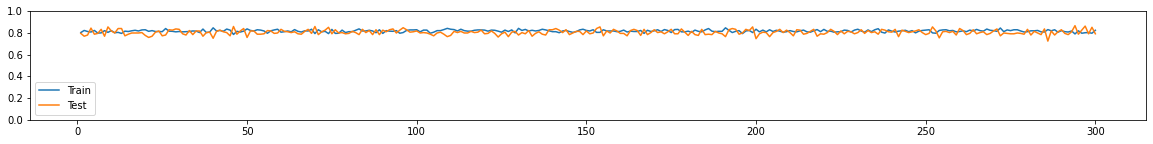

In [90]:
fig = plt.figure(figsize =(20, 2))
plt.plot(shuffled['Shuffle No'],shuffled['train_accuracy'], label='Train')
plt.plot(shuffled['Shuffle No'],shuffled['cv_accuracy'], label='Test')
plt.legend()
plt.ylim((0,1))
plt.show()

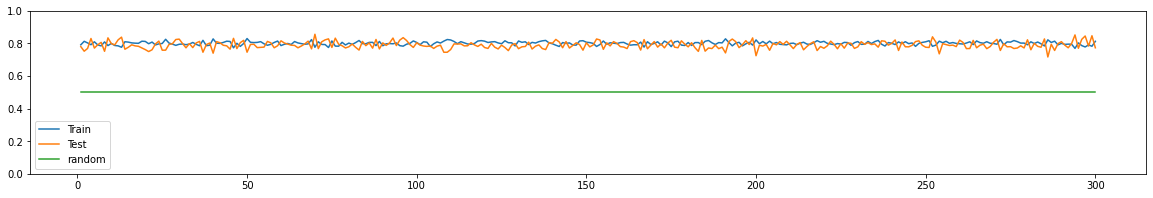

In [91]:
fig = plt.figure(figsize =(20, 3))
plt.plot(shuffled['Shuffle No'],shuffled['train_auc'], label='Train')
plt.plot(shuffled['Shuffle No'],shuffled['cv_auc'], label='Test')
plt.plot(shuffled['Shuffle No'],[0.5]*len(shuffled['Shuffle No']),label="random")
plt.legend()
plt.ylim((0,1))
plt.show()

In [92]:
from sklearn.linear_model import LogisticRegression
import scipy.stats

def do_lreg(df):
    sample = df.sample(df.shape[0], replace=True)
    X_tr = sample[[c for c in sample.columns if c != 'y']]
    y_tr = sample.y
    lr = LogisticRegression(penalty='l2', solver='liblinear')
    lr.fit(X_tr, y_tr)
    params = [lr.intercept_[0]] +  list(lr.coef_[0])
    return params

def get_se(X, y):
    lr = LogisticRegression(penalty='l2', solver='liblinear')
    lr.fit(X, y)
    df = pd.DataFrame(X)
    df['y'] = y
    r_df = pd.DataFrame([do_lreg(df) for _ in range(100)])
    w = [lr.intercept_[0]] + list(lr.coef_[0])
    se = r_df.std()
    dof = X.shape[0] - X.shape[1] - 1
    summary = pd.DataFrame({
        'coeff': w,
        'se': se,
        'z': w / se,
        '.025': w - se,
        '.975': w + se,
        'df': [dof for _ in range(len(w))]
    })
    summary['P>|z|'] = scipy.stats.t.sf(abs(summary.z), df=summary.df)
    return summary

x = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y = np.array(dff['Survived'].values)
logistic_coeff_summary = get_se(x, y)
logistic_coeff_summary['features'] = ['intercept']+list(dff.columns)[1:]
logistic_coeff_summary

,coeff,se,z,.025,.975,df,P>|z|,features
0,0.171722,0.208735,0.822678,-0.037013,0.380457,877,2.054573e-01,intercept
1,1.827700,0.242517,7.536389,1.585184,2.070217,877,6.018766e-14,Sex
2,-0.031898,0.007969,-4.002810,-0.039867,-0.023929,877,3.394351e-05,Age
3,-0.000420,0.002580,-0.162973,-0.003000,0.002159,877,4.352885e-01,Fare
4,1.261647,0.214684,5.876772,1.046963,1.476331,877,2.969547e-09,pclass=1
5,0.104146,0.147572,0.705729,-0.043426,0.251717,877,2.402719e-01,pclass=2
6,-1.194071,0.141127,-8.460943,-1.335198,-1.052944,877,5.513446e-17,pclass=3
7,-0.281580,0.129520,-2.174029,-0.411100,-0.152060,877,1.498488e-02,Embarked=S
8,0.254789,0.181846,1.401129,0.072944,0.436635,877,8.076459e-02,Embarked=C
9,0.198512,0.201077,0.987245,-0.002565,0.399589,877,1.618974e-01,Embarked=Q


In [93]:
drop_feat_pval = logistic_coeff_summary[logistic_coeff_summary['P>|z|']>0.05]['features']
drop_feat_pval.values

array(['intercept', 'Fare', 'pclass=2', 'Embarked=C', 'Embarked=Q',
       'initials=Miss'], dtype=object)

In [94]:
dff.drop(['Fare','Embarked=Q','Embarked=C','Embarked=S','pclass=2','initials=Miss'],axis=1,inplace=True)
x_new = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y_new = np.array(dff['Survived'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
x_train, x_cv, y_train, y_cv = train_test_split(
    x_new,
    y,
    test_size=0.25,
    random_state=0
)
model_new = LogisticRegression(penalty='l2', solver='liblinear')
model_new.fit(x_train,y_train)
y_pred = model_new.predict(x_cv)
print("Overall Accuracy of Logistic Model on CV dataset: ",sum([y_pred==y_cv][0])/len(y_cv))
print("Overall Accuracy of Logistic Model on Train dataset: ",sum([model_new.predict(x_train)==y_train][0])/len(y_train))
print("Recall on CV dataset: TP/(TP+FN) is := ",len(y_pred[(y_cv==y_pred) & (y_pred==1)])/( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==0)])))
print("Precision on CV dataset: TP/(TP+FP) is := ", len(y_pred[(y_cv==y_pred) & (y_pred==1)]) / ( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) ))
print("F1 Score on CV dataset: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y_cv, y_pred)) + (1/precision_score(y_cv, y_pred))) )
print("AUC Score on CV dataset:= ", roc_auc_score(y_cv, y_pred))

Overall Accuracy of Logistic Model on CV dataset:  0.7668161434977578
Overall Accuracy of Logistic Model on Train dataset:  0.8053892215568862
Recall on CV dataset: TP/(TP+FN) is :=  0.7142857142857143
Precision on CV dataset: TP/(TP+FP) is :=  0.6818181818181818
F1 Score on CV dataset: 2/(1/recall + 1/precision) is :=  0.6976744186046512
AUC Score on CV dataset:=  0.7564234326824255


In [95]:
y = np.array(dff['Survived'])
x = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y_pred = model_new.predict(x)
print("Overall Accuracy of Logistic Model on dataset: ",sum([y_pred==y][0])/len(y))
print("Recall on dataset: TP/(TP+FN) is := ",len(y_pred[(y==y_pred) & (y_pred==1)])/( len(y_pred[(y==y_pred) & (y_pred==1)]) + len(y_pred[(y!=y_pred) & (y_pred==0)])))
print("Precision on dataset: TP/(TP+FP) is := ", len(y_pred[(y==y_pred) & (y_pred==1)]) / ( len(y_pred[(y==y_pred) & (y_pred==1)]) + len(y_pred[(y!=y_pred) & (y_pred==1)]) ))
print("F1 Score on dataset: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y, y_pred)) + (1/precision_score(y, y_pred))) )
print("AUC Score on dataset:= ", roc_auc_score(y, y_pred))
print("Features used in Final model: ",[col for col in list(dff.columns) if col!='Survived'])

Overall Accuracy of Logistic Model on dataset:  0.7957351290684624
Recall on dataset: TP/(TP+FN) is :=  0.7192982456140351
Precision on dataset: TP/(TP+FP) is :=  0.7409638554216867
F1 Score on dataset: 2/(1/recall + 1/precision) is :=  0.7299703264094956
AUC Score on dataset:=  0.7813248969418081
Features used in Final model:  ['Sex', 'Age', 'pclass=1', 'pclass=3', 'initials=Master', 'initials=Mr', 'initials=Mrs']


In [96]:
df_test = pd.read_csv("/content/test.csv")
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [97]:
df_test.isna().sum()[df_test.isna().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [98]:
import itertools
listOLists = [df_test['Pclass'].unique(), df_test['Sex'].unique()]
sequence = pd.DataFrame(columns=['Pclass','Sex','mean_Age','median_age','% of Age missing'])
for l in itertools.product(*listOLists):
    a=df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].mean()
    b=df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].median()
    c=str((100*df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].isna().sum()/df_test['Age'].isna().sum())*100//1/100)+"%"
    sequence.loc[len(sequence),:] = [*list(l),a,b,c]
sequence

,Pclass,Sex,mean_Age,median_age,% of Age missing
0,3,male,24.525104,24.0,58.13%
1,3,female,23.0734,22.0,25.58%
2,2,male,30.940678,28.0,4.65%
3,2,female,24.376552,24.0,1.16%
4,1,male,40.52,42.0,8.13%
5,1,female,41.333333,41.0,2.32%


In [99]:
for l in itertools.product(*listOLists):
  df_test.loc[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) & (df_test['Age'].isnull()),'Age'] = df_test.loc[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) , ['Age']].median()[0]

In [100]:
df_test.isna().sum()[df_test.isna().sum()>0]

Fare       1
Cabin    327
dtype: int64

In [101]:
dff_test = df_test.copy()
dff_test['Sex']=dff_test['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff_test['pclass=1'] = (dff_test['Pclass']==1).astype('int')
dff_test['pclass=3'] = (dff_test['Pclass']==3).astype('int')
dff_test['initials'] = dff_test['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])
dff_test['initials=Master'] = (dff_test['initials']=='Master').astype('int')
dff_test['initials=Mr'] = (dff_test['initials']=='Mr').astype('int')
dff_test['initials=Mrs'] = (dff_test['initials']=='Mrs').astype('int')
dff_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass=1,pclass=3,initials,initials=Master,initials=Mr,initials=Mrs
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,1,Mr,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,1,Mrs,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,0,Mr,0,1,0


In [102]:
dfff = dff_test.copy()
dfff.drop(['PassengerId','Pclass','Name','SibSp','initials','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [103]:
dfff.head(2)

,Sex,Age,pclass=1,pclass=3,initials=Master,initials=Mr,initials=Mrs
0,0,34.5,0,1,0,1,0
1,1,47.0,0,1,0,0,1


In [104]:
model = LogisticRegression(penalty='l2', solver='liblinear')
x = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y = np.array(dff['Survived'])
model.fit(x,y)

x_test = np.array(dfff[[col for col in list(dfff.columns) if col!='Survived']])
y_pred = model_new.predict(x_test)
dfff['Survived'] = y_pred
dff_test['Survived'] = y_pred

In [105]:
dff_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass=1,pclass=3,initials,initials=Master,initials=Mr,initials=Mrs,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,1,Mr,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,1,Mrs,0,0,1,1


In [106]:
submission = dff_test.loc[:,['PassengerId','Survived']]

In [107]:
submission = dff_test.loc[:,['PassengerId','Survived']]